# How does Airbnb impact the housing market in London: 
## An empirical analysis of Airbnb listings in London Borough.

## Executive Summary

This paper assesses the links between two aspects: the housing market and the Airbnb in London. Clusters, histograms, trend plots and heat maps of correlations are used to analyse the relationship between the two. Result of data analysis, the sharing economy has significantly impacted London's housing market, particularly in terms of housing prices. Short-term renting generates income from unused space, adding value due to the additional income opportunities. It encourages landlords to change their properties from long-term to short-term rentals. More and more homes enter the short-term rental market, leading to tight housing stock and higher house prices. It is recommended that the UK increase regulation to allow landlords to move to the long-term rental market and ease residents' pressure from rising house prices.


In [34]:
import pandas as pd
#read Airbnb data
dataframe=u'Documents/CASA0013/Final/London/Airbnb.csv'
df=pd.read_csv(dataframe)
#define the high area borough and all borough 
res = df["neighbourhood_cleansed"].value_counts()
high_borough = res.keys()[:10]
all_borough  = res.keys()
print(high_borough)

Index(['Westminster', 'Tower Hamlets', 'Hackney', 'Kensington and Chelsea',
       'Camden', 'Islington', 'Lambeth', 'Southwark', 'Wandsworth',
       'Hammersmith and Fulham'],
      dtype='object')


In [33]:
#read the rent prices data
df = pd.read_excel(r"Documents/LondonCharts/rent.xls", sheet_name="Summary")

In [14]:
import pandas as pd
df = pd.read_csv(r"Desktop/LondonCharts/listings.csv")
f = open(r"Desktop/LondonCharts/data1.txt", "w")
count = 0
s = ""
for i,r in df.iterrows():
     f.write('{"value": [%f, %f, %d]},\n' % (r["longitude"], r["latitude"], r["number_of_reviews"]))

In [15]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from functools import partial

def year_limit(s, year):
    return type(s) == datetime.datetime and s.year == year

df = pd.read_excel(r"Desktop/LondonCharts/House_price.xlsx", sheet_name="Average price")
df.rename(columns={'Unnamed: 0':'time'}, inplace = True)

year_range = list(range(2015, 2020))

price_trend = [df[df["time"].apply(partial(year_limit, year = i))].mean()[:33].mean() for i in year_range]
print(price_trend)

[483686.5910775253, 521855.3527439394, 538511.1129239899, 533415.5244972223, 523395.078320707]


In [16]:
df = pd.read_excel(r"Desktop/LondonCharts/rent.xls", sheet_name="Raw data", header = 2)
df = df[df["Category"] == "All categories"]
def borough_limit(s, boroughs):
    return type(s) == str and s in boroughs

def year_boroughs(year, boroughs):
    
    t = df[df["Year"] == year]
    t = t[df[df["Year"] == year]["Area"].apply(partial(borough_limit, boroughs = boroughs))]
    s = 0
    for name, group in t.groupby("Area"):
        dc = pd.to_numeric(group["Average"], errors='coerce').isnull().sum()
        # print(name, pd.to_numeric(group["Average"], errors='coerce').mean())
        s += pd.to_numeric(group["Average"], errors='coerce').mean() / (33 - dc)
    return s

rent_trend = [year_boroughs(year, all_borough) for year in year_range]
print(rent_trend)

[1549.3787878787878, 1605.2878787878788, 1614.5151515151513, 1584.515151515152, 1628.212121212121]


In [17]:
def year_limit_(s, year):
    return type(s) == str and str(year) in s

df = pd.read_csv(r"Desktop/LondonCharts/airbnb.csv")
def airbnb_count_year_boroughs(year, boroughs):
    t = df[df["host_since"].apply(partial(year_limit_, year = year))]
    return t["neighbourhood_cleansed"].apply(partial(borough_limit, boroughs = boroughs)).values.tolist().count(True) / len(boroughs)

all_trend = [airbnb_count_year_boroughs(year, all_borough) for year in year_range]
print(all_trend)
high_trend = [airbnb_count_year_boroughs(year, high_borough) for year in year_range]
print(high_trend)

[435.57575757575756, 339.030303030303, 259.6060606060606, 223.0909090909091, 220.24242424242425]
[997.1, 719.3, 556.6, 474.2, 457.2]


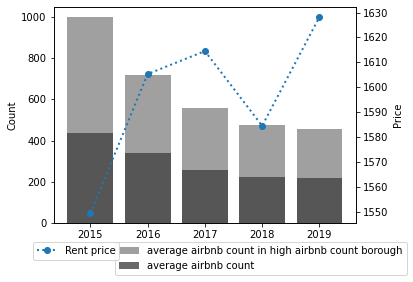

In [18]:
fig, ax1 = plt.subplots(figsize=(6,5))
ax1.bar(year_range, high_trend, label='average airbnb count in high airbnb count borough', color='#888', alpha=0.8)
ax1.bar(year_range, all_trend, label='average airbnb count', color='#444', alpha=0.8)
ax1.set_ylabel("Count")
ax2 = ax1.twinx()
ax2.plot(year_range, rent_trend, ':o', label='Rent price', linewidth=2)
ax2.set_ylabel("Price")
ax1.legend(bbox_to_anchor=(1.2, -0.04), loc=1, borderaxespad=1)
ax2.legend(bbox_to_anchor=(0.25, -0.04), loc=1, borderaxespad=1)
plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.3)
plt.savefig(r"Desktop/LondonCharts/results/rent and Airbnb.png", dpi=500)

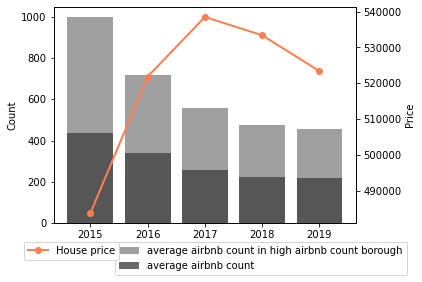

In [20]:
fig, ax1 = plt.subplots(figsize=(6,5))
ax1.bar(year_range, high_trend, label='average airbnb count in high airbnb count borough', color='#888', alpha=0.8)
ax1.bar(year_range, all_trend, label='average airbnb count', color='#444', alpha=0.8)
ax1.set_ylabel("Count")
ax2 = ax1.twinx()
ax2.plot(year_range, price_trend, '-o', label='House price', linewidth=2, color='coral')
ax2.set_ylabel("Price")
ax1.legend(bbox_to_anchor=(1.2, -0.04), loc=1, borderaxespad=1)
ax2.legend(bbox_to_anchor=(0.25, -0.04), loc=1, borderaxespad=1)
plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.3)
plt.savefig(r"Desktop/LondonCharts/results/housing price and Airbnb.png", dpi=500)

In [27]:
import pandas as pd
dataframe=u'Documents/CASA0013/Final/London/Airbnb.csv'
df=pd.read_csv(dataframe)
res = df["neighbourhood_cleansed"].value_counts()
template = open(r"Desktop/new/chart1.template", "r", encoding="utf-8")
f = open(r"chart1.html", "w", encoding="utf-8")
s = ""
for i, v in res.items():
    s += '{name: "%s", value: %d},\n' % (i, v)
s = s[:-2]
tp = template.read()
f.write(tp.replace("{{MARK}}", s))
f.close()

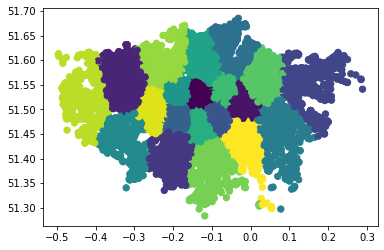

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

f = open("Desktop/new/chart2.template", "r", encoding="utf-8")
fo = open("chart2.html", "w", encoding="utf-8")
tp = f.read()
df = pd.read_csv("Desktop/new/listings.csv")
X = np.array(df.loc[:, ["latitude", "longitude"]])
kmeans = KMeans(20, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
df["kmeans_label"] = labels
d = []

reviews = df.groupby(df["kmeans_label"]).sum()["reviews_per_month"]
for i, center in enumerate(kmeans.cluster_centers_):
	d.append({"value": [center[1], center[0], reviews[i]]})

fo.write(tp.replace("{{MARK}}", str(d)))

plt.scatter(X[:, 1], X[:, 0], c=labels, s=40, cmap='viridis')
plt.show()

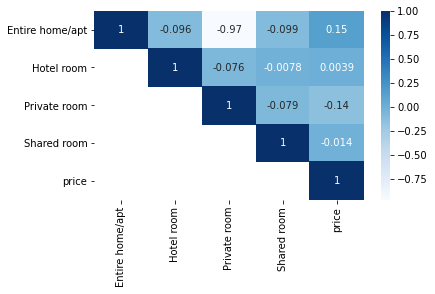

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def intprice(s):
	if type(s) == str and s[0] == "$":
		s = s.replace(",", "")
		return float(s[1:])

df = pd.read_csv("Desktop/new/Airbnb.csv")
df["price"] = df["price"].apply(intprice)

rt = [name for name, _ in df.groupby("room_type")]
for i in rt:
	df[i] = (df["room_type"] == i).apply(lambda x: 1 if x else 0)
attr = rt + ["price"]

cor = df.loc[:, attr].corr()
mask = np.zeros_like(cor)
for i in range(1,len(mask)):
    for j in range(0, i):
        mask[i][j] = True

sns.heatmap(cor, mask = mask, cmap="Blues", annot=True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(r"chart5.png", dpi=500)
plt.show()

      All categories  Four or more Bedrooms  One Bedroom  Room  Studio  \
0                  0                      0            0     1       0   
1                  0                      0            0     1       0   
2                  0                      0            0     1       0   
3                  0                      0            0     1       0   
4                  0                      0            0     1       0   
...              ...                    ...          ...   ...     ...   
6155               1                      0            0     0       0   
6156               1                      0            0     0       0   
6157               1                      0            0     0       0   
6158               1                      0            0     0       0   
6159               1                      0            0     0       0   

      Three Bedroom  Two Bedroom      Average  
0                 0            0  1299.461172  
1              

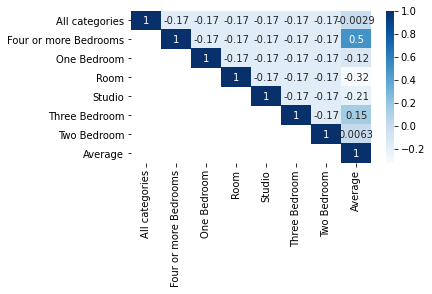

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("Desktop/new/rent.xls", sheet_name="Raw data", header = 2)
v = df[df["Average"].apply(lambda x: type(x) == int)]["Average"].mean()
def av(s):
	if type(s) == int:
		return s
	else:
		return v

rt = [name for name, _ in df.groupby("Category")]
for i in rt:
	df[i] = (df["Category"] == i).apply(lambda x: 1 if x else 0)
attr = rt + ["Average"]
pd.set_option("display.max_column", 500)
df["Average"] = df["Average"].apply(av)

print(df.loc[:, attr])
cor = df.loc[:, attr].corr()
print(cor)
mask = np.zeros_like(cor)
for i in range(1,len(mask)):
    for j in range(0, i):
        mask[i][j] = True

sns.heatmap(cor, mask = mask, cmap="Blues", annot=True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(r"chart6.png", dpi=500)
plt.show()

## Introduction：Airbnb Distribution in London

Figure 1 shows the status of Airbnb listings in 2016. It is easy to see that the Westminster area has the highest number of available rentals. The closer you are to central London, the greater the number of available properties, while the surrounding areas have far fewer.

The second analysis shows the level of Airbnb activity in London. Figure 2 is also based on user reviews' distribution after renting a home on Airbnb in 2016. some ghost homes on the Airbnb marketplace refer to hotels on Airbnb that are not occupied by their owners and are essentially short-term rental schemes managed by a company that sometimes posts false profiles. As such homes are recorded in the listings, we use the number of user reviews for each home as the activity level. A higher number of reviews means that the home is more popular. Figure 3 shows the clustering distribution from Figure 2, where the range of circles represents the reviews' intensity. The graph shows that Airbnb housing activity is concentrated around the River Thames, a phenomenon that corresponds to the distribution of tourist attractions in the London area, with a high concentration in the central area north of the river.

From these three charts, we can see that Westminster has the highest number of reviews in the whole of London. Compare the number of Airbnb rentals for each area in Figure 1 and combine the fact that most of London's famous attractions are concentrated in the Westminster area and many important organisations. Tourism is one of the most important major sectors of the economy. In terms of ONS, tourism is worth £145.92 billion to the UK economy, accounting for 7.2% of the UK's GDP (Janson, 2019), and this figure is increasing year on year. The sharing economy, like Airbnb, has opened up new avenues for tourism in the UK. As a result, renters are more active in the area due to geographical distance. We can conclude that the distance from the city centre has a big impact on the adoption of Airbnb. For example, the further away from the city centre, the fewer opportunities for shared accommodation.

![Aaron Swartz][https://github.com/UCFNXGU/CASA0013/raw/main/Chart1.png]

## Correlation of price and room types, and impact of short-term renting market

The correlation coefficient shows that Airbnb prices are highly correlated with the entire home/apt, followed by a hotel room, with the remaining two claiming a negative correlation. The graph shows the correlation between the rental market and room type. The average price is positively correlated with room types larger than one room, while there is a negative correlation with room types with only one room. The rental market prefers multiple room types. This phenomenon is contrary to the current situation presented by Airbnb price and room type. This is because the two markets have different user groups. For tourists, they want to live in an undisturbed environment; for residents, the majority of those who rent are those who live in the area but cannot afford to buy a house, and many families will have more than one family member and need a larger number of rooms and are part of a long-term rental clientele. This is also in line with the economic perspective: the price reflects the demand of the market. As can be seen, room types have little impact on the short-term rental market for different customer groups, Airbnb.



## The Complex Problem With Housing Market and Airbnb

Firstly, there are house prices and Airbnb numbers. Figure 4 shows house prices and Airbnb's number in the two regions from 2015 to 2019. The grey histogram shows the number of new Airbnb's added each year, indicating a decreasing trend in the number of listings year on year, but an increase in the cumulative number of listings. At the same time, this situation is the same as the average number of Airbnb's. The orange line indicates that house prices increased in 2016 and rose slightly in 2017. In the following two years, house prices have fallen significantly.

The second analysis is the rent price and average Airbnb count. Rent prices calculation is the same as the housing prices. The histogram has the same data as Figure 4 and presents the same meaning. Meanwhile, the rent price exploded in 2016. Between 2015 and 2019, rents generally showed an increasing trend.

The shift in housing from long-term to short-term rentals has led to an increase in demand for long-term stable rentals, forcing people with long-term stable rental needs to frequently turn to the short-term rental market and, on the other hand, forcing them to buy homes. Congestion in the short-term rental market and increased demand for housing purchases naturally leads to a rapid reduction in the housing stock, leading to an increase in house prices. The emergence of Airbnb has harmed house prices and community building, leading to a migration to the short-term rental market and a rise in house prices (Harvard Business Review).

In response, the UK government has introduced a 90-day short-term rental policy that limits the short-term use of homes to no more than 90 days per year, meaning that homes cannot be used permanently as temporary accommodation all year round and any impact on local amenities is kept within acceptable limits. The government's reforms will provide Londoners with an appropriate degree of freedom and flexibility to rent out their homes temporarily without the disproportionate burden of requiring planning permission (residential short-term use).

Despite this, the reality is that in terms of listings, whole-house listings account for only 6.5% of the housing stock in the boroughs with the highest concentration of holiday lets such as Westminster, Kensington and Chelsea. A report by Capital Economics, a London-based economic research and advisory firm, noted that around 2.7 per cent of the 1.5 million homeowners have shifted to short-term rentals, meaning that more than 50,000 long-term tenants cannot use their homes. This behaviour will increase long-term demand in the housing market while increasing pressure on long-term rents and homeownership. In the survey, 10% of people are considering moving their private property to the short-term market. There are many reasons for this phenomenon. More than a third said mortgage rates had fallen to 0% (Barker, 2020). This should be an efficiency gain, stimulating housing demand and thus pushing up house prices. Short-term rentals may lead to a reallocation of existing housing stock from the long-term rental market to privately owned homes, thus increasing rents. On its face, this may not seem like much, but it is a process of rising costs for those wishing to rent or buy on a long-term basis.


## Conclusion

The number of Airbnb houses is influenced by location, the closer to the area people want, the more homes there are, and vice versa. Airbnb's customer demand is the opposite of what residents want in terms of the type of housing available in the rental market. The housing market sees soaring prices for buying and selling homes and an overall upward trend in rental prices, while Airbnb's cumulative number of rentable homes is increasing. The UK has introduced a 90-day policy and rental relaxation, but the impact of Airbnb on house prices remains and is influencing housing supply.


## References
